# About Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Content
For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### Tips
What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)

KNIME is a great tool (GUI) that can be used for this.
1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"

3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)

4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')

5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and

6- Partitioning Node test data split output to input Decision Tree predictor Node

7- Decision Tree learner Node output to input Decision Tree Node input

8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

### Acknowledgements
This dataset is available on UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

Citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Relevant publication
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

In [510]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [511]:
# importing the data
df = pd.read_csv('winequality-red.csv')

In [512]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [513]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Exploratory Data Analysis

In [515]:
# descriptive summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [516]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [517]:
df.duplicated().sum()

240

In [518]:
df.drop_duplicates(inplace = True)

In [519]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

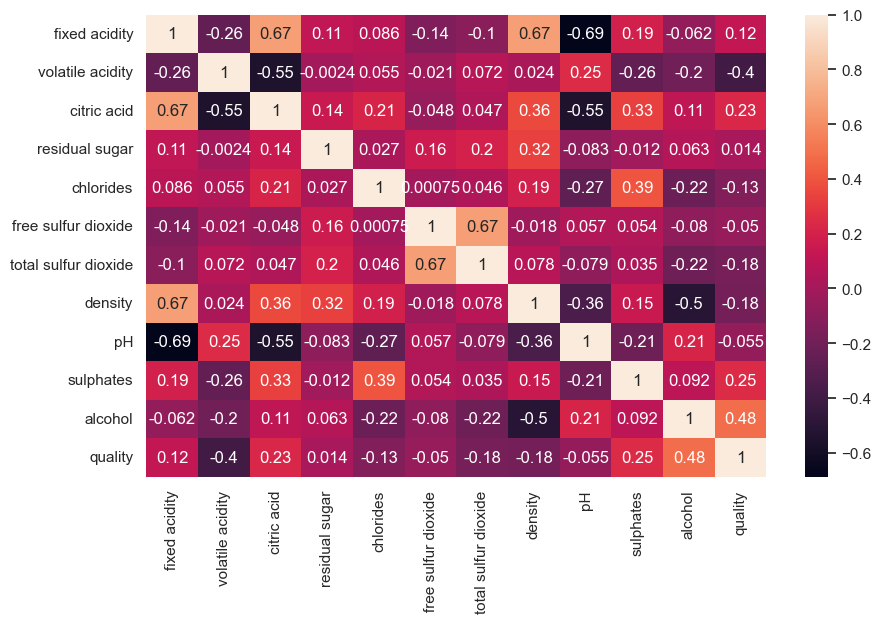

In [520]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [521]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

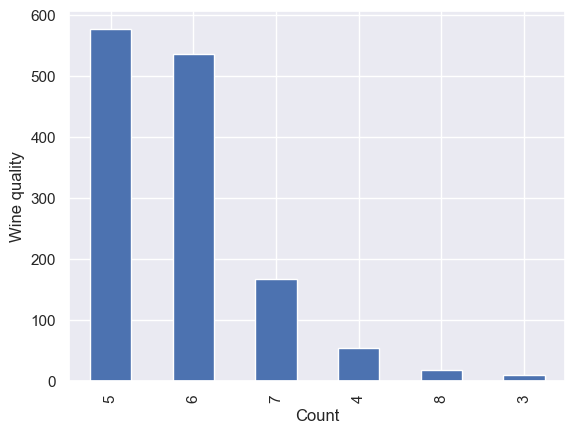

In [522]:
# let us plot the target column
df['quality'].value_counts().plot(kind = 'bar')
plt.xlabel('Count')
plt.ylabel('Wine quality')
plt.show()

we can see this is an imbalanced dataset

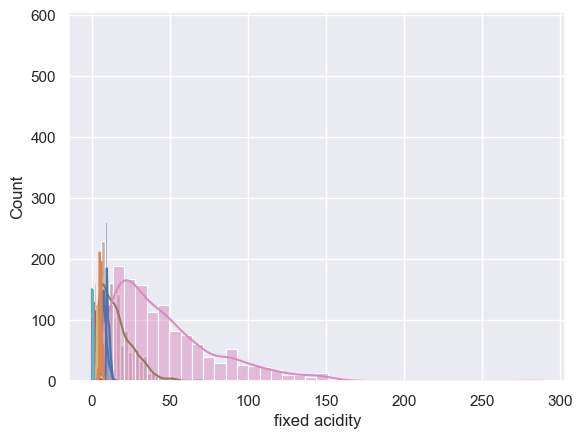

In [523]:
# let us check the distribution in the columns
for column in df.columns:
    sns.histplot(df[column], kde = True)

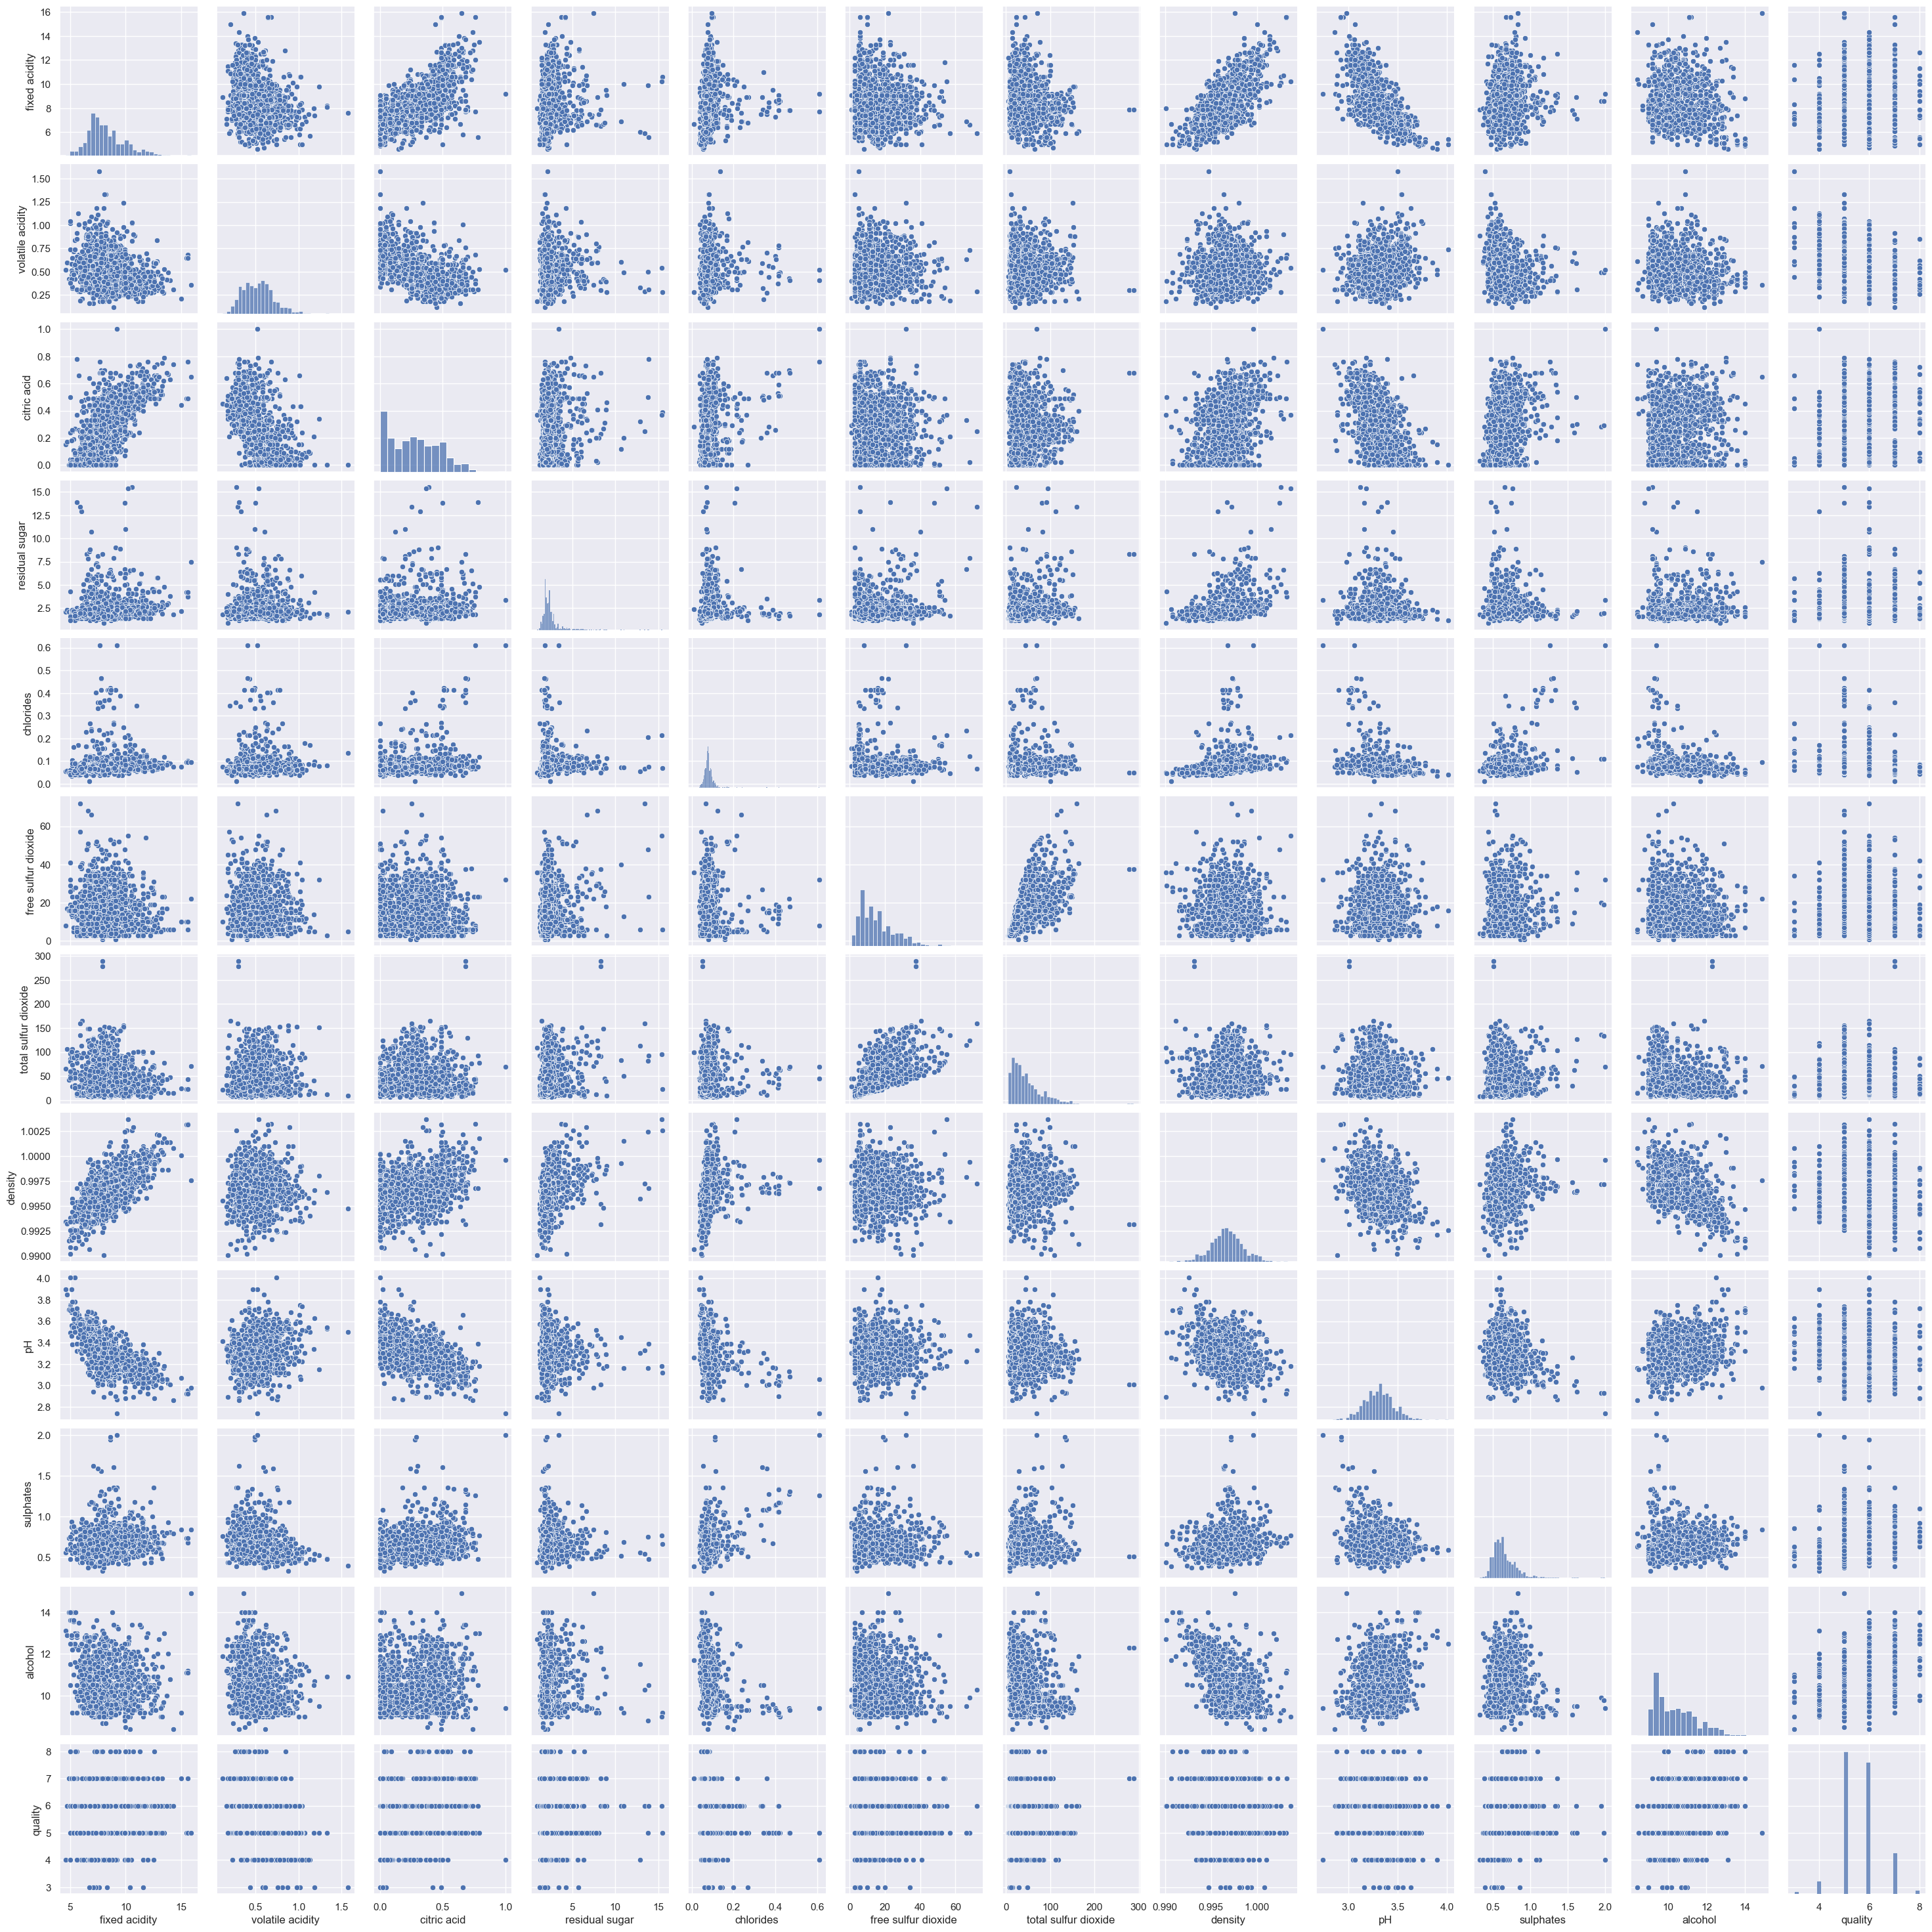

In [524]:
# univariate, bivariate, multivariate analysis
sns.pairplot(df)

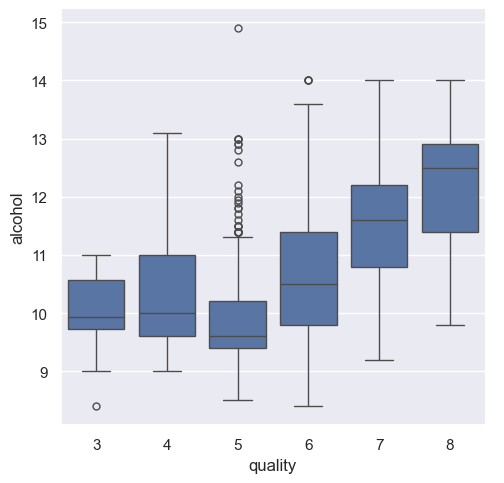

In [525]:
sns.catplot(x = 'quality', y = 'alcohol', data =df, kind = 'box')

<Axes: xlabel='fixed acidity', ylabel='pH'>

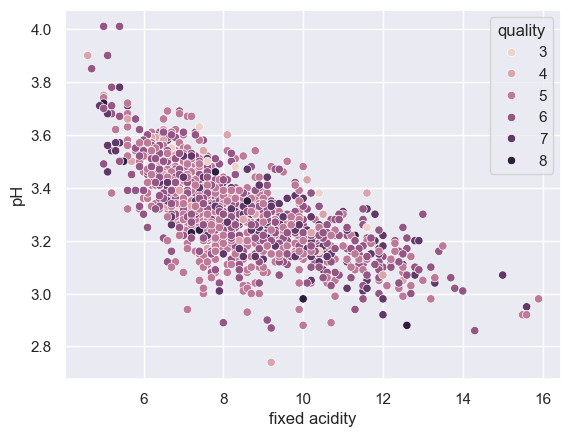

In [526]:
sns.scatterplot(x = 'fixed acidity', y ='pH', hue = 'quality', data =df)

In [527]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [528]:
# convert quality to binary classification
df['quality_binary'] = df['quality'].apply(lambda x:1 if x>= 7 else 0)

In [529]:
df['quality_binary'].value_counts()

quality_binary
0    1175
1     184
Name: count, dtype: int64

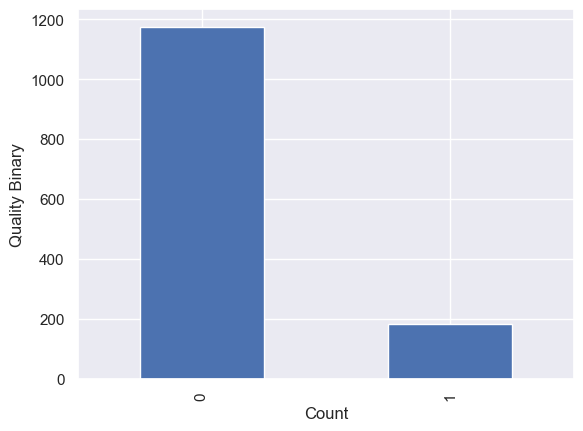

In [530]:
df['quality_binary'].value_counts().plot(kind = 'bar')
plt.xlabel('Count')
plt.ylabel('Quality Binary')
plt.show()

In [531]:
# let us balance the imba,abced dataset
df['quality_binary'].value_counts()

quality_binary
0    1175
1     184
Name: count, dtype: int64

In [532]:
# let us balance the dataset
df_majority = df[df['quality_binary'] == 0]
df_minority = df[df['quality_binary'] == 1 ]


In [533]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [534]:
df_minority_upsampled.shape

(1175, 13)

In [535]:
df_minority_upsampled['quality_binary'].value_counts()

quality_binary
1    1175
Name: count, dtype: int64

In [536]:
df_majority['quality_binary'].value_counts()

quality_binary
0    1175
Name: count, dtype: int64

In [537]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [538]:
df_upsampled['quality_binary'].value_counts()

quality_binary
1    1175
0    1175
Name: count, dtype: int64

In [539]:
df_upsampled.drop(columns = 'quality', inplace = True)

In [540]:
df_upsampled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_binary'],
      dtype='object')

In [541]:
x = df_upsampled.iloc[:, :-1]
y = df_upsampled.iloc[:, -1]

In [542]:
# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [543]:
x_scaled = scaler.fit_transform(x)

In [544]:
# split train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 4)

In [545]:
# Build and train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [546]:
# Decision Tree
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(x_train, y_train)
y_pred_decisionTree = decisionTree_model.predict(x_test)

In [547]:
# Random Forest
randomForest_model = RandomForestClassifier()
randomForest_model.fit(x_train, y_train)
y_pred_randomForest = randomForest_model.predict(x_test)

In [548]:
# Linear Regression
LogRegression_model = LogisticRegression()
LogRegression_model.fit(x_train, y_train)
y_pred_LogRegression = LogRegression_model.predict(x_test)

In [549]:
print(f'Decision Tree Report:\n {classification_report(y_test, y_pred_decisionTree)}')

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       233
           1       0.88      1.00      0.94       237

    accuracy                           0.93       470
   macro avg       0.94      0.93      0.93       470
weighted avg       0.94      0.93      0.93       470



In [550]:
print(f'Random Forest Report: \n {classification_report(y_test, y_pred_randomForest)}')

Random Forest Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       233
           1       0.92      1.00      0.96       237

    accuracy                           0.95       470
   macro avg       0.96      0.95      0.95       470
weighted avg       0.96      0.95      0.95       470



In [551]:
print(f'Logistic Regression Report: \n {classification_report(y_test, y_pred_LogRegression )}')

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       233
           1       0.78      0.86      0.82       237

    accuracy                           0.81       470
   macro avg       0.81      0.81      0.81       470
weighted avg       0.81      0.81      0.81       470



#### Evaluate using roc curve

In [552]:
# Predict probabilities for ROC curve
y_prob_dt = decisionTree_model.predict_proba(x_test)[:, 1]
y_prob_rf = randomForest_model.predict_proba(x_test)[:, 1]
y_prob_lr = LogRegression_model.predict_proba(x_test)[: ,1]

In [553]:
# compute the roc curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

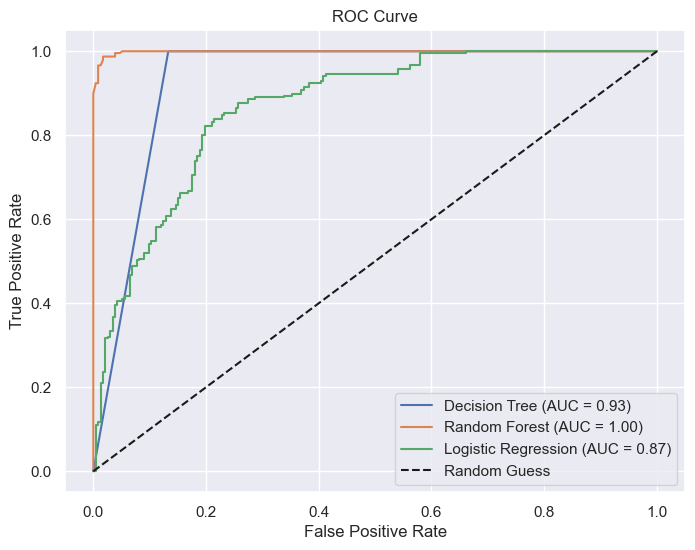

In [554]:
# plot the roc curve
plt.figure(figsize = (8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(fpr_lr, tpr_lr, label =f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Feature Importance Analysis

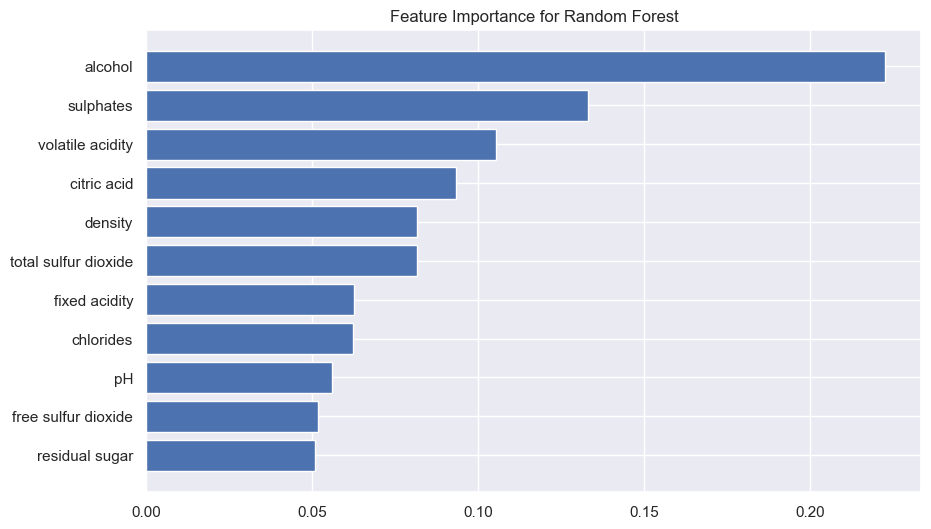

In [555]:
# Feature importance from Random Forest
import numpy as np

feature_importance = randomForest_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(x.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(x.shape[1]), [x.columns[i] for i in sorted_idx])
plt.title("Feature Importance for Random Forest")
plt.show()


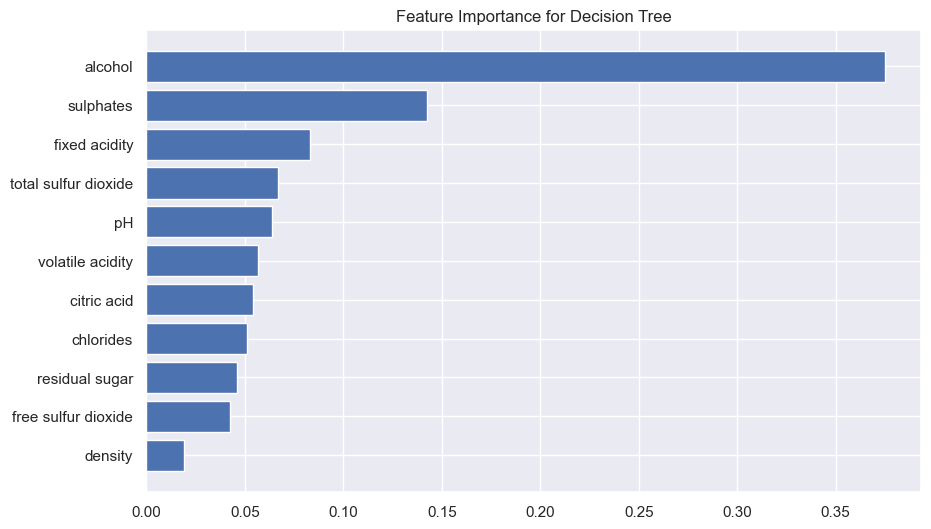

In [556]:
# Feature importance from Decision Tree Forest
import numpy as np

feature_importance = decisionTree_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(x.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(x.shape[1]), [x.columns[i] for i in sorted_idx])
plt.title("Feature Importance for Decision Tree")
plt.show()


## Model Evaluation

In [557]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(randomForest_model, X=x_train, y= y_train, cv = 10)
print(f'Random Forest Classifier Accuracy: {score.mean():.2f} ± {score.std():.2f}')

Random Forest Classifier Accuracy: 0.96 ± 0.01


In [558]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(decisionTree_model, X=x_train, y= y_train, cv = 10)
print(f'Random Forest Classifier Accuracy: {score.mean():.2f} ± {score.std():.2f}')

Random Forest Classifier Accuracy: 0.94 ± 0.01


In [559]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogRegression_model, X=x_train, y= y_train, cv = 10)
print(f'Logistic Regression Accuracy: {score.mean():.2f} ± {score.std():.2f}')

Logistic Regression Accuracy: 0.82 ± 0.02


In [560]:
# Random Forest
Accuracy = accuracy_score(y_test, y_pred_randomForest)
Precision = precision_score(y_test, y_pred_randomForest)
Recall = recall_score(y_test, y_pred_randomForest)
F1 = f1_score(y_test, y_pred_randomForest)

In [561]:
model_result1 = pd.DataFrame([['Random Forest',Accuracy, Precision, Recall, F1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [562]:
# Decision Tree
Accuracy = accuracy_score(y_test, y_pred_decisionTree)
Precision = precision_score(y_test, y_pred_decisionTree)
Recall = recall_score(y_test, y_pred_decisionTree)
F1 = f1_score(y_test, y_pred_decisionTree)

In [563]:
model_result2 = pd.DataFrame([['Decision Tree', Accuracy, Precision, Recall, F1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [564]:
# Logistic Regression
Accuracy = accuracy_score(y_test, y_pred_LogRegression)
Precision = precision_score(y_test, y_pred_LogRegression)
Recall = recall_score(y_test, y_pred_LogRegression)
F1 = f1_score(y_test, y_pred_LogRegression)

In [565]:
model_result3 = pd.DataFrame([['Logistic Regression', Accuracy, Precision, Recall, F1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [566]:
model_results = pd.concat([model_result1, model_result2, model_result3], ignore_index = True)

In [567]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.953191,0.915058,1.000000,0.955645
1,Decision Tree,0.934043,0.884328,1.000000,0.938614
2,Logistic Regression,0.806383,0.776515,0.864979,0.818363


# From the results:

    Random Forest and Decision Tree are both highly accurate, with Random Forest having a slight edge in precision and F1 score.
    Logistic Regression is the least accurate among these models, with lower performance in accuracy, precision, recall, and F1 score.